In [2]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata


In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix 

In [5]:
iris=fetch_ucirepo(id=53)
X=iris.data.features
Y=iris.data.targets

In [6]:
X.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

In [7]:
X.shape

(150, 4)

In [8]:
X.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head(5)

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [10]:
le=LabelEncoder()
Y_encoded=le.fit_transform(Y)
unique_labels=list(set(Y.to_numpy().reshape(-1).tolist()))
# unique_labels
unique_labels

C:\Users\Agrim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

In [11]:
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

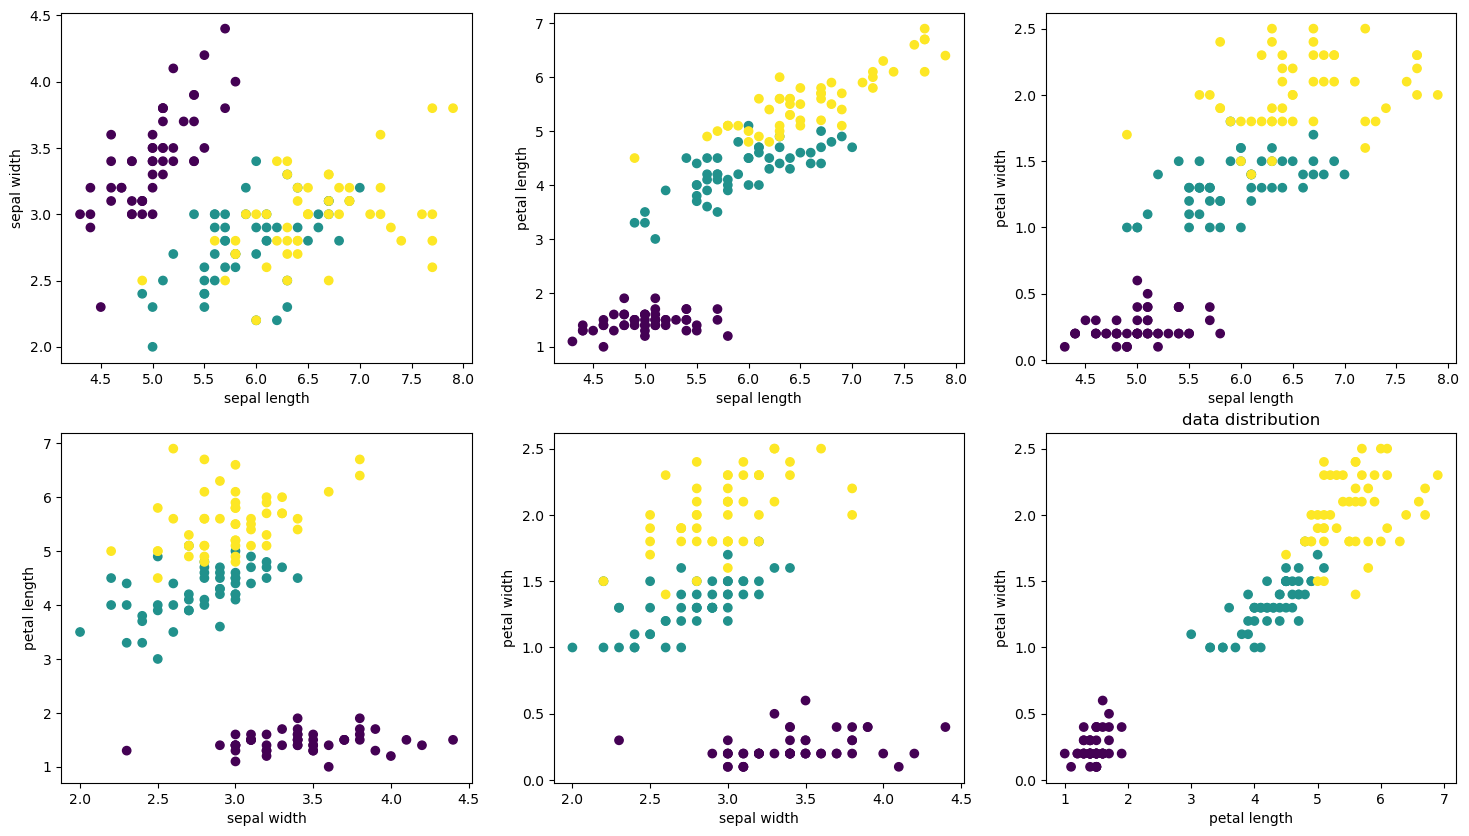

In [12]:
combinations=list(itertools.combinations(X.columns,2))
# print(combinations)
plt.figure(figsize=(18,10))
for i in range(len(combinations)):
    plt.subplot(2,3,i+1)
    plt.scatter(X[combinations[i][0]],X[combinations[i][1]],c=Y_encoded)
    plt.xlabel(combinations[i][0])
    plt.ylabel(combinations[i][1])
plt.title("data distribution")
plt.show()
# plt.savefig("Images/iris.jpg")

In [13]:
def train_test_split(random_state:int,train_split:float,X:pd.DataFrame,Y:pd.DataFrame):
    np.random.seed(random_state)
    perm = np.random.permutation(len(X))
    X=X.iloc[perm]
    Y=Y[perm]
    
    split_idx = int(train_split * len(X))
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    Y_train, Y_test = Y[:split_idx], Y[split_idx:]
    print(X_train.shape,X_test.shape)
    
    return X_train,X_test,Y_train,Y_test

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(42,0.85,X,Y_encoded)

(127, 4) (23, 4)


In [15]:
class KNN:
    def __init__(self,train_x:pd.DataFrame,train_y:np.array):
        self.train_x=train_x
        self.train_y=train_y
        
    def predict(self,X:pd.DataFrame,k:int):
        X=X.to_numpy()
        dists = np.sqrt(
            np.expand_dims(np.sum(X**2, axis=1),axis=-1)
            + np.expand_dims(np.sum(self.train_x**2, axis=1),axis=0)
            - 2 * np.dot(X, self.train_x.T)
        )
        # print(dists.shape)
        neighbors_idx = np.argsort(dists, axis=1)[:, :k]
        neighbor_labels = self.train_y[neighbors_idx].squeeze()

        y_pred = np.array([np.bincount(row).argmax() for row in neighbor_labels])
        return y_pred

In [16]:
classifier=KNN(X_train,Y_train)

6


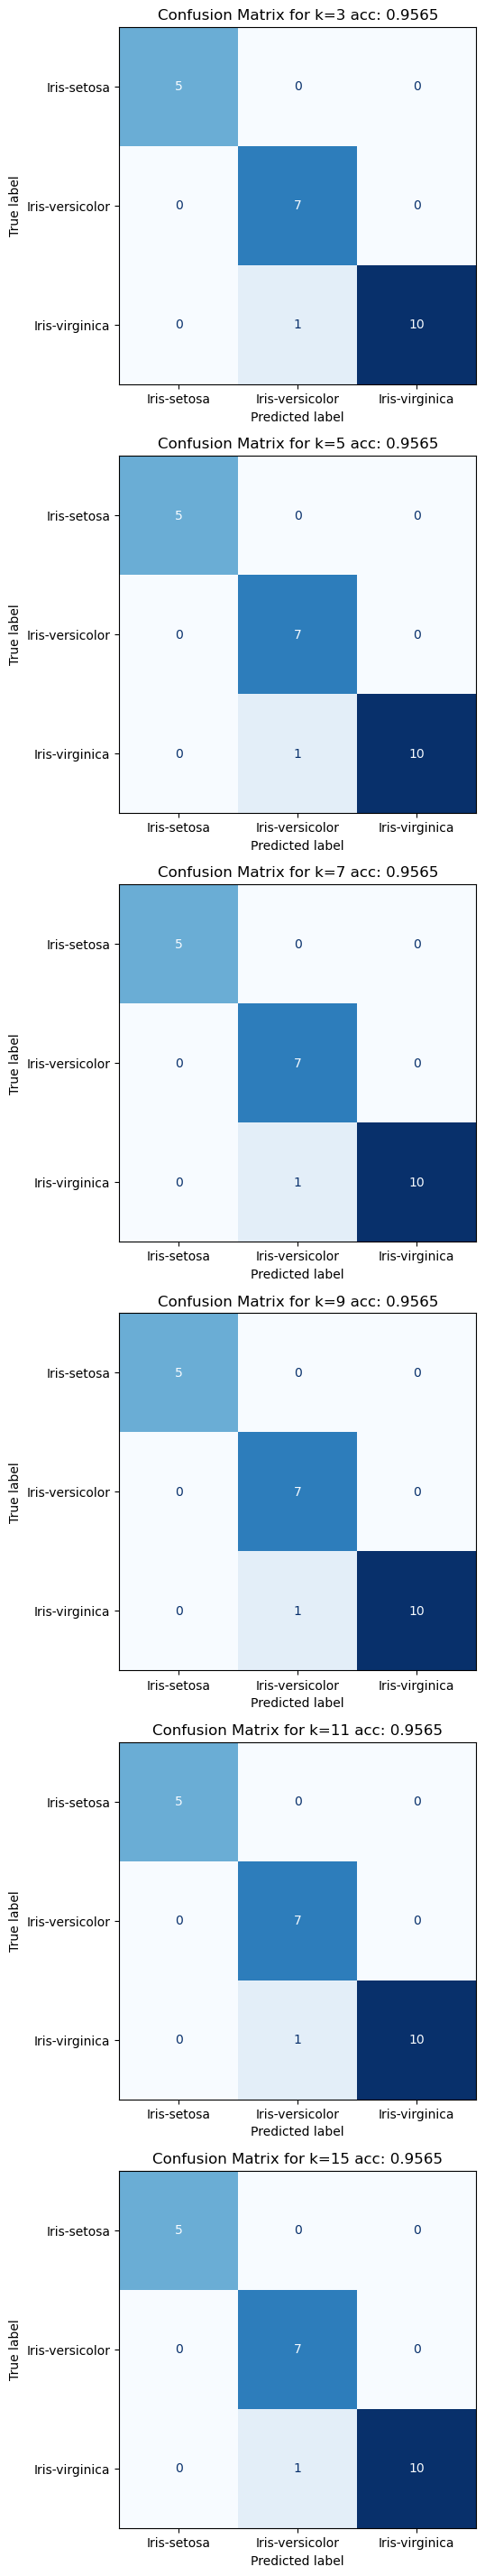

In [17]:
ks=[3,5,7,9,11,15]

fig, axes = plt.subplots(len(ks), 1, figsize=(12, 36))

accuracies=[]
for i,k in enumerate(ks):

    plt.subplot(len(ks),1,i+1)
    predictions=classifier.predict(X_test,k)
    cm=confusion_matrix(Y_test,predictions)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="Blues", values_format="d", ax=axes[i], colorbar=False)
    acc=(predictions==Y_test).sum()/Y_test.shape[0]
    axes[i].set_title(f"Confusion Matrix for k={k} acc: {acc:.4f}")
    accuracies.append(acc)
print(len(accuracies))
plt.show()

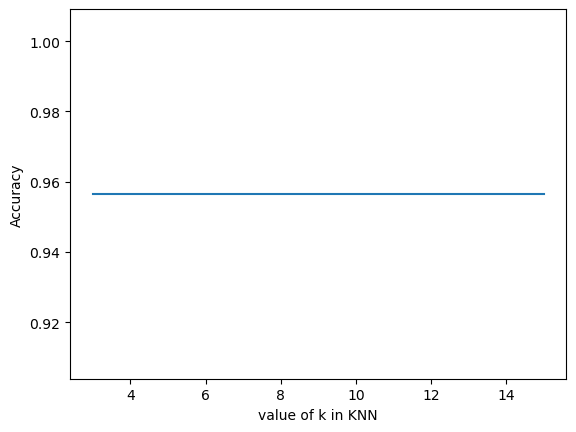

In [18]:
plt.plot(ks,accuracies)
plt.xlabel("value of k in KNN")
plt.ylabel("Accuracy")
plt.show()

In [19]:
#wine dataset
iris=fetch_ucirepo(id=109)
X_wine=iris.data.features
Y_wine=iris.data.targets

le_wine=LabelEncoder()
Y_wine_encoded=le_wine.fit_transform(Y_wine)

C:\Users\Agrim\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
X_wine.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
Y_wine.head(5)

,class
0,1
1,1
2,1
3,1
4,1


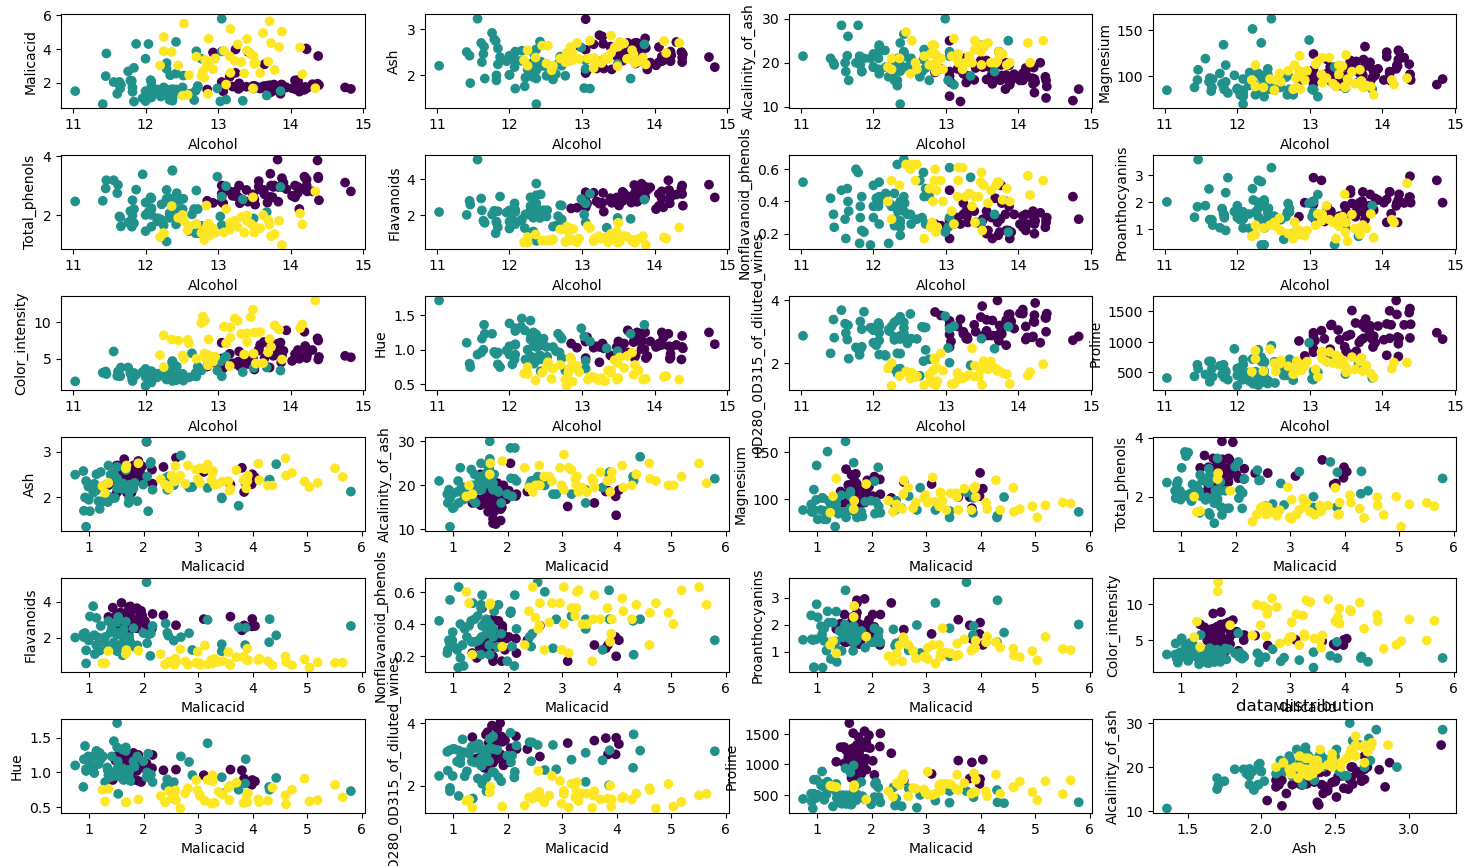

In [22]:
combinations_wine=list(itertools.combinations(X_wine.columns,2))
Y_wine=Y_wine.to_numpy()

# print(combinations)
plt.figure(figsize=(18,12))
for i in range(24):
    plt.subplot(8,4,i+1)
    plt.scatter(X_wine[combinations_wine[i][0]],X_wine[combinations_wine[i][1]],c=Y_wine_encoded)
    plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.5)
    plt.xlabel(combinations_wine[i][0])
    plt.ylabel(combinations_wine[i][1])
plt.title("data distribution")
# plt.savefig('Images/wine.jpg')
plt.show()

In [23]:
X_train_wine,X_test_wine,Y_train_wine,Y_test_wine=train_test_split(42,0.85,X_wine,Y_wine)
print(X_train_wine.shape,Y_train_wine.shape,X_test_wine.shape,Y_test_wine.shape)

(151, 13) (27, 13)
(151, 13) (151, 1) (27, 13) (27, 1)


In [24]:
wine_classifier=KNN(X_train_wine,Y_train_wine)

6


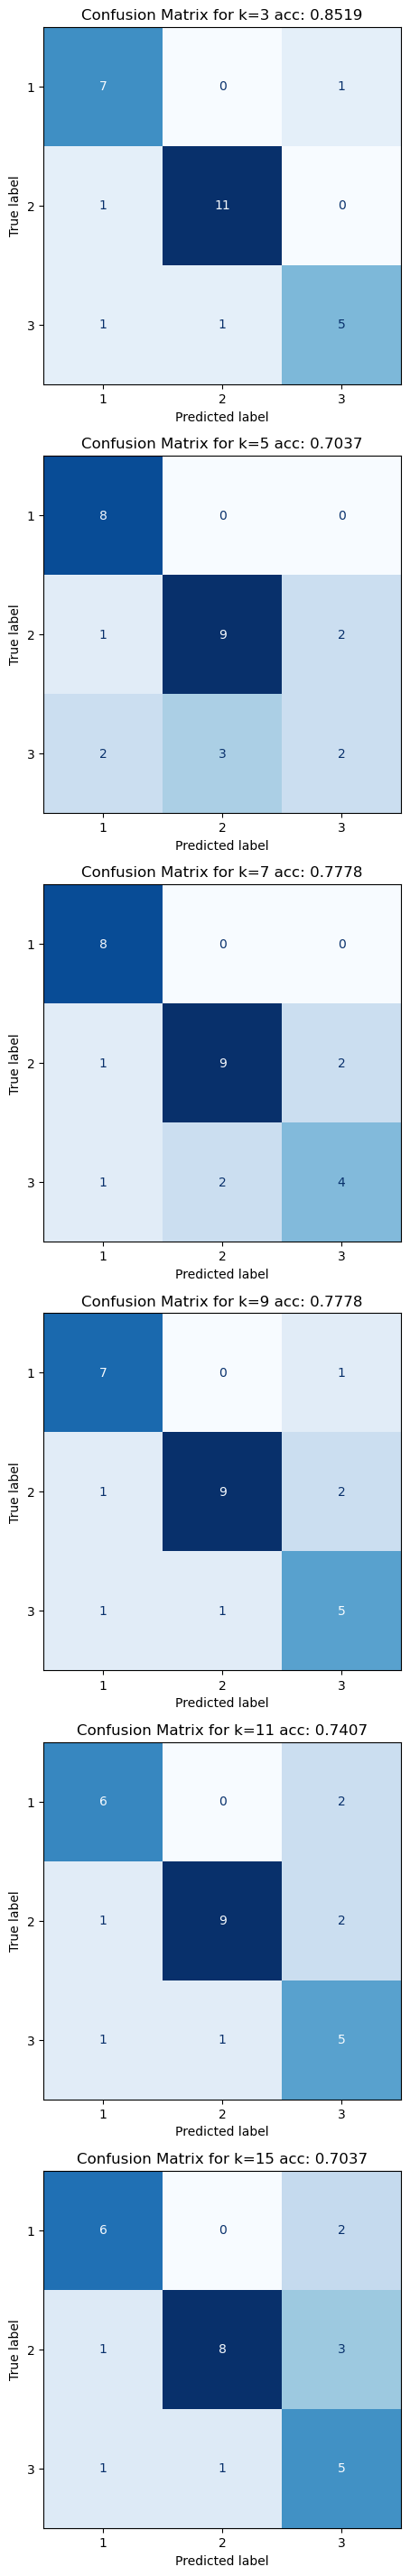

In [25]:
ks=[3,5,7,9,11,15]

fig, axes = plt.subplots(len(ks), 1, figsize=(12, 36))

accuracies_wine=[]
for i,k in enumerate(ks):

    plt.subplot(len(ks),1,i+1)
    predictions_wine=wine_classifier.predict(X_test_wine,k)
    cm_wine=confusion_matrix(Y_test_wine,predictions_wine)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_wine, display_labels=le_wine.classes_)
    disp.plot(cmap="Blues", values_format="d", ax=axes[i], colorbar=False)
    # print(predictions_wine)
    # print(Y_test_wine)
    acc=(predictions_wine==Y_test_wine.reshape(-1)).sum()/Y_test_wine.shape[0]
    axes[i].set_title(f"Confusion Matrix for k={k} acc: {acc:.4f}")
    accuracies_wine.append(acc)
print(len(accuracies_wine))
plt.show()

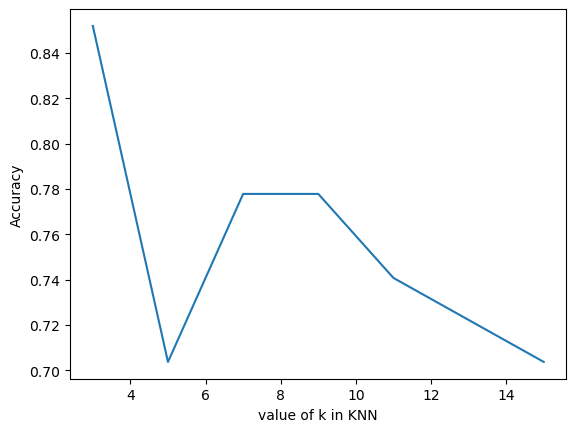

In [26]:
plt.plot(ks,accuracies_wine)
plt.xlabel("value of k in KNN")
plt.ylabel("Accuracy")
plt.show()